In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pickle
import os


In [2]:
#set file tags:
tag='Multispectral, Biofouled: ' 
tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"
filetag='SQOOP_Amir_v4'

In [3]:
#make directories and set figure output names
figurepath='figures/'+filetag
try: 
    os.mkdir(figurepath)
except OSError as error: 
    print(error)  
    
figurepath_indiv=figurepath+'/individual/'
try: 
    os.mkdir(figurepath_indiv)
except OSError as error: 
    print(error) 
    
fig_outname=figurepath+'/'+filetag
fig_outname_indiv=figurepath_indiv+'/'+filetag 

In [4]:
# read pickle files as dataframes
outname='data/'+filetag
df_name=outname+'_df.pkl'
fdfe_name=outname+'_fdfe.pkl'
vars_name=outname+'_vars.pkl'

f = open(vars_name, 'rb')
waveln,meas,rel_err,sys_err,jac_all = pickle.load(f)
f.close()

df = pd.read_pickle(df_name)
fdfe = pd.read_pickle(fdfe_name)
fdfe


,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median
0,0.5,30.1,0.01,0.04,0.05,0.062132,15.0,40.0,15.0,0.033716,15.596373,0.995451,3.800365
1,0.5,30.1,0.01,0.04,0.05,0.015612,15.0,40.0,30.0,0.008951,13.897329,0.999678,3.851701
2,0.5,30.1,0.01,0.04,0.05,0.011205,15.0,40.0,60.0,0.006823,13.318258,0.999813,3.467803
3,0.5,30.1,0.01,0.04,0.05,0.013147,15.0,110.0,15.0,0.007814,14.355953,0.999755,3.785735
4,0.5,30.1,0.01,0.04,0.05,0.014239,15.0,110.0,30.0,0.008333,13.887696,0.999721,3.846963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13116,10.0,94.9,0.95,0.30,2.00,0.017224,60.0,110.0,15.0,0.010335,8.875308,0.999573,2.520026
13117,10.0,94.9,0.95,0.30,2.00,0.020515,60.0,110.0,30.0,0.012436,8.687063,0.999381,2.326679
13118,10.0,94.9,0.95,0.30,2.00,0.036893,60.0,110.0,60.0,0.021763,7.962746,0.998105,2.559545
13119,10.0,94.9,0.95,0.30,2.00,0.020387,60.0,170.0,15.0,0.011918,8.998302,0.999431,2.753483


In [5]:
#calculates the probability of detection given the parameter value (mu) and uncertainty (sigma)
#assumes PDF is gaussian normally distributed
def detect_prob(mu, sigma, doprint=0): 

    Pd = 1-0.5*(1+erf((-1*mu)/(sigma*np.sqrt(2))))  #detection probability, modified from CDF function

    Pd_pcnt_str=str(np.around(Pd*100,decimals=1))+'% positive probability' #string output version

    if doprint > 0:
        print(Pd_pcnt_str)

    return Pd, Pd_pcnt_str

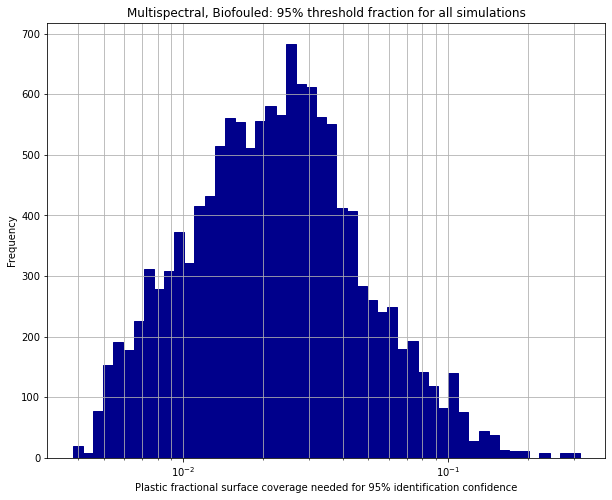

In [6]:
bn=50

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction for all simulations'
plt.title(titl)

this=fdfe['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='FMF=0.01',color='darkblue',edgecolor='darkblue')

plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_all.pdf'
plt.savefig(fig_filename)
plt.show()

[0.5, 5.0, 10.0]


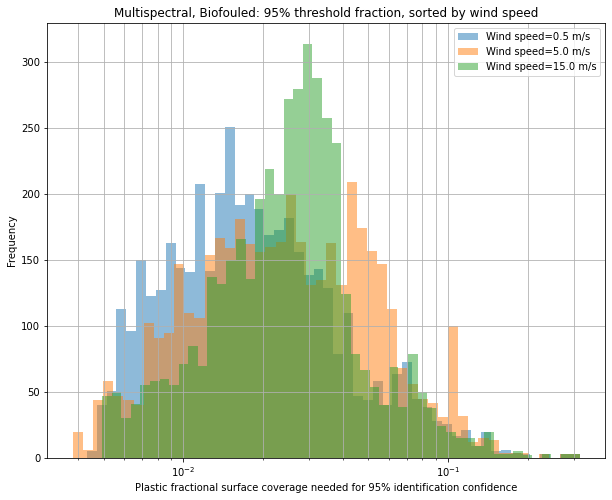

In [7]:
bn=50

a = fdfe['Windspeed(m_s)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by wind speed'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=0.5 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==5.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=5.0 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==10.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=15.0 m/s')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_windspeed.pdf'
plt.savefig(fig_filename)
plt.show()


[30.1, 70.0, 94.9]


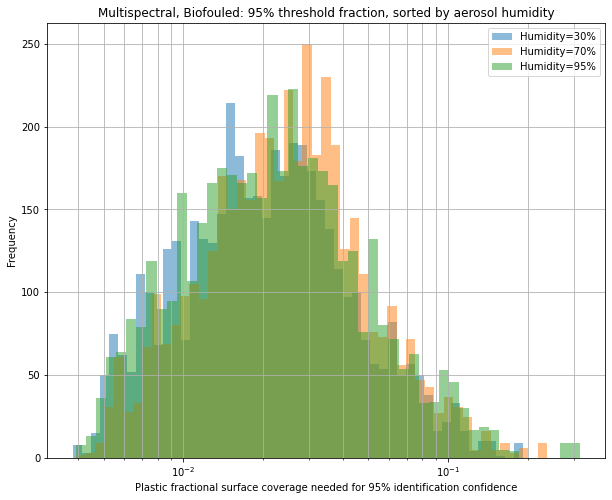

In [8]:
bn=50

a = fdfe['Humidity(%)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol humidity'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==30.1]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=30%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==70.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=70%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==94.9]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=95%')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_humidity.pdf'
plt.savefig(fig_filename)
plt.show()

[0.01, 0.5, 0.95]


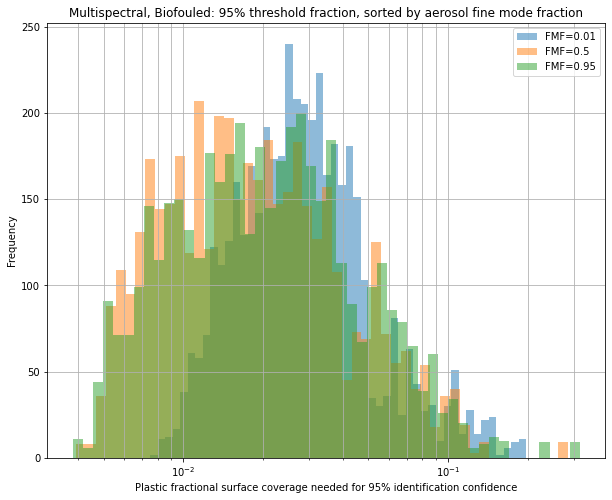

In [9]:
bn=50

a = fdfe['FMF'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol fine mode fraction'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['FMF']==0.01]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.01')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.5')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.95]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.95')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_fmf.pdf'
plt.savefig(fig_filename)
plt.show()

[0.04, 0.07, 0.1, 0.15, 0.2, 0.3]


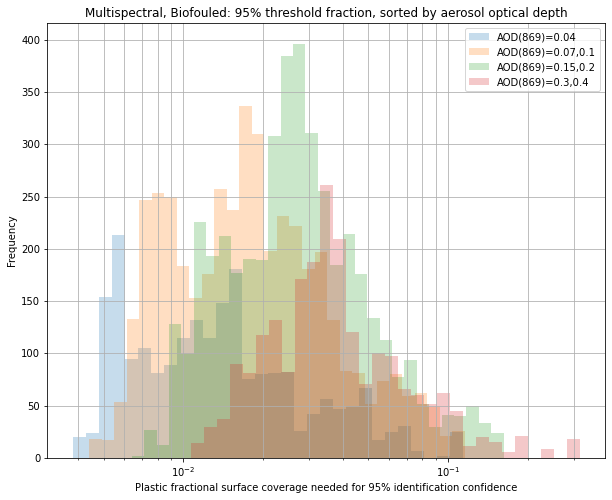

In [10]:
bn=30

a = fdfe['AOD(869)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol optical depth'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['AOD(869)']==0.04]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.04')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.07) | (fdfe['AOD(869)']==0.1)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.07,0.1')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.15) | (fdfe['AOD(869)']==0.2)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.15,0.2')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.3) | (fdfe['AOD(869)']==0.4)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.3,0.4')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_aod.pdf'
plt.savefig(fig_filename)
plt.show()


[0.05, 0.5, 2.0]


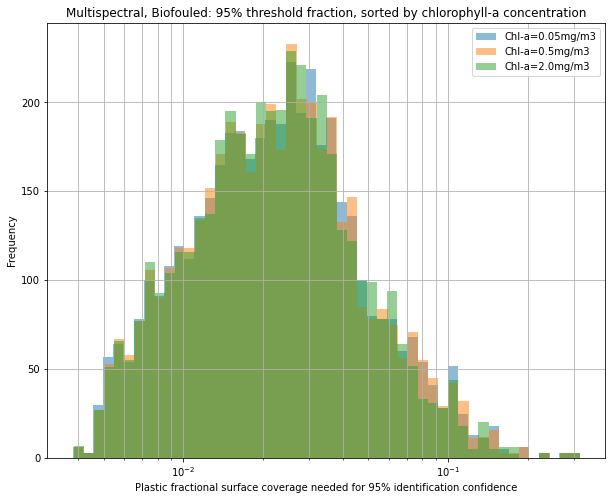

In [11]:
bn=50

a = fdfe['chla(mg_m3)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by chlorophyll-a concentration'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.05]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.05mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.5mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==2.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=2.0mg/m3')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_chla.pdf'
plt.savefig(fig_filename)
plt.show()


[15.0, 30.0, 60.0]


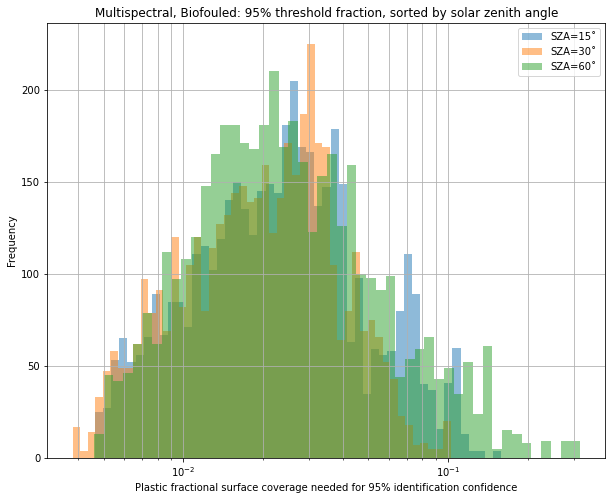

In [12]:
bn=50

a = fdfe['solz'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by solar zenith angle'
plt.title(titl)


this=fdfe['plastic_threshold'][fdfe['solz']==15.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=15˚')

this=fdfe['plastic_threshold'][fdfe['solz']==30.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=30˚')

this=fdfe['plastic_threshold'][fdfe['solz']==60.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=60˚')

plt.legend(loc='upper right') 
plt.xlabel('Plastic fractional surface coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')

fig_filename = fig_outname+'_solz.pdf'
plt.savefig(fig_filename)
plt.show()


In [13]:
#plot individual results

#waveln,meas,err,jac_all

shp = np.shape(jac_all) #get size of output
z_len=shp[0]

for idx in range(0, z_len,100):
    if (idx % 1000) == 0:
        txt=str(idx)+' of '+str(z_len)
        print(txt)

    err=((meas[idx]*rel_err) + sys_err) #generate error for plotting
    
    #plotting specifics
    font1 = {'family':'serif','color':'black','size':20}
    font2 = {'family':'serif','color':'black','size':15}
    font3 = {'family':'courier new','color':'black','size':20}
    plt.figure(figsize=(16,16)) 
    plt.subplot(2, 2, 1)
    
    #plot simulated values
    plt.scatter(waveln,meas[idx])
    plt.errorbar(waveln,meas[idx],yerr=err,fmt='-')
    plt.title("Simulated data with error bars",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('$rho_t$', fontdict = font2)
    plt.ylim(0.0,0.4)

    #prepare jacobian
    this_jac=jac_all[idx]
    jac=this_jac.transpose()

    #plot jacobians
    plt.subplot(2, 2, 2)
    plt.plot(waveln,this_jac[:,0],'-',label='WS')
    plt.plot(waveln,this_jac[:,1],'-',label='RH')
    plt.plot(waveln,this_jac[:,2],'-',label='FMF')
    plt.plot(waveln,this_jac[:,3],'-',label='AOD')
    plt.plot(waveln,this_jac[:,4],'-',label='CHL')
    plt.plot(waveln,this_jac[:,5],'-',label='PF')
    plt.title("Jacobians",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('Parameter partial derivative', fontdict = font2)
    plt.ylim(-0.3,0.8)
    plt.legend()
    
    
    #plot detection threshold info    
    #calculate detection probability metrics
    inc=np.arange(0, 10000, 1)
    val=inc/10000
    det_prob=np.arange(0, 10000, 1) / 10000
    for x in inc:
        Pd, Pd_pcnt_str = detect_prob(val[x], df.loc[idx].plastic_uncertainty, doprint=0)
        det_prob[x] = Pd
       
    plt.subplot(2, 2, 3)
    plt.plot(val,det_prob)
    plt.xscale('log')
    plt.title("Plastic detection probability",fontdict = font1)
    plt.xlabel('Plastic fraction',fontdict = font2)
    plt.ylabel('Probability for plastic fraction', fontdict = font2)
    
    #label plot    
    plt.subplot(2, 2, 4)
    plt.axis('off')

    txt='SQOOP simulation # '+str(idx)
    plt.text(.05,0.95,txt,horizontalalignment='left',
         verticalalignment='center',fontdict=font3)
    plt.text(.05,0.55,str(df.loc[idx]),horizontalalignment='left',
         verticalalignment='center',fontdict=font3)    
    
    #finish up
    outname=fig_outname_indiv+'_'+str(idx)+'.pdf'
    plt.savefig(outname)
    plt.close()



0 of 131220
1000 of 131220
2000 of 131220
3000 of 131220
4000 of 131220
5000 of 131220
6000 of 131220
7000 of 131220
8000 of 131220
9000 of 131220
10000 of 131220
11000 of 131220
12000 of 131220
13000 of 131220
14000 of 131220
15000 of 131220
16000 of 131220
17000 of 131220
18000 of 131220
19000 of 131220
20000 of 131220
21000 of 131220
22000 of 131220
23000 of 131220
24000 of 131220
25000 of 131220
26000 of 131220
27000 of 131220
28000 of 131220
29000 of 131220
30000 of 131220
31000 of 131220
32000 of 131220
33000 of 131220
34000 of 131220
35000 of 131220
36000 of 131220
37000 of 131220
38000 of 131220
39000 of 131220
40000 of 131220
41000 of 131220
42000 of 131220
43000 of 131220
44000 of 131220
45000 of 131220
46000 of 131220
47000 of 131220
48000 of 131220
49000 of 131220
50000 of 131220
51000 of 131220
52000 of 131220
53000 of 131220
54000 of 131220
55000 of 131220
56000 of 131220
57000 of 131220
58000 of 131220
59000 of 131220
60000 of 131220
61000 of 131220
62000 of 131220
63000